<img src="https://so2whq.bn.files.1drv.com/y4mqnHAGaRH-gr8Mpsy5bmkKcW-od3ybPqZ1dfeyKq6UskCZ5-QG2sXglEh2LF6FaMcrUTsBTU68YqnA0UMUK-dPd1s5nUnDDd_LnHSQlseUwhOPgeFJx4Z1X1isIkQDWqgFLBvUIchTZzL1GqesRxirZYnAsZuYw7xBAWt-d3ybpmU-djrblL1yq5m94VzwliHA3KW5XNVULfqZovPEy-fMg?width=2655&height=1368&cropmode=none" width="2655" height="1368" />

When supermassive stars that are about eight times the size of our Sun die, they produce colorful supernovae high in hydrogen and helium, then leave behind either a neutron star or a black hole, if its mass is high enough. A pulsar is a type of neutron star. It is highly magnetized and emits strong radiowaves from both its poles while rotating very fast. On Earth, their emissions are detected as pulses of radiation observed when the beams sweep along the planet’s direction$^{5, 8}$.

Pulsars are valuable, mainly in the fields of cosmology and astrophysics. Specifically in the areas exploring the extreme states of matter, spacecraft navigation, and in more recent developments, gravitational wave detection$^1$. 

In the emerging field of gravitational wave astronomy, they deal with the detection of these “ripples” in the fabric of spacetime that convey certain events in the Universe, such as the merging of two black holes$^3$. As a consequence of these distortions, variations in the arrival times of radio signals tend to be observed. To confirm that these detected variations are indeed caused by gravitational waves and not noise, astronomers make use of Pulsar Timing Arrays (PTA), since the arrival time of their periodic radio pulses can often be accurately predicted$^8$. 

In practice, however, the signal received from the radio telescopes are often quite indistinguishable from the ones caused by radiofrequency interferences or actual noise. With modern pulsar surveys producing larger volumes of data by the day, manually identifying pulsars would be overly tedious. Thus, interest in automating the process of pulsar identification is on the rise$^{5, 8}$. 

# <font color = "navy"> A) Problem Statement

The group wishes to identify whether a certain emission pattern of a star belongs to a pulsar given the 8 recorded numerical characteristics of their radio signals from the HTRU2 dataset. 

# <font color = "navy"> B) Three Highlights of the results 

### <font color = "dimgray"> 1.	Only 9 of 100 observations are pulsars, oversampling was done to address this bias.
### <font color = "dimgray">2.	Processing integrated pulse profile into DM-SNR curve hardly improves accuracy.
### <font color = "dimgray">3.	Simpler model using 3 best features (kurtosis, skewness, mean) is possible.

# <font color = "navy"> C) Data Discussion

In order to classify a data sample as a pulsar or not a pulsar, we need to be able to extract some information on the data sample that can characterize its class.  The individual bursts of emission from a pulsar (i.e. the pulses) do not have a constant shape or amplitude, so individually they’re not very useful for uniquely identifying a pulsar.  Because the individual pulses are all different, astronomers stack them up and create an average integrated pulse profile to characterize a pulsar$^7$.   The integrated pulse profile is comparable to fingerprints for uniquely identifying humans.

Additionally, the pulse will arrive at different times across different radio frequencies.  The delay from frequency to frequency is caused by the ionized inter-stellar medium and is known as the **_dispersion_**.  Astronomers fit for the shape of the delay in order to compensate for its effect, but there’s always an uncertainty associated with the fit.  That is expressed in the DM-SNR (“dispersion-measure-signal-to-noise-ratio”) curve.  When you put these two curves together it means that for each pulsar candidate, there are **eight numerical characteristic features** that can be extracted: four from the integrated pulse profile and four from the DM-SNR curve$^{5,6}$. 

<img src="https://s42whq.bn.files.1drv.com/y4m0DWnxeqxJ-sKPg72R1dn5S2cCxb234uQ3iiRP3E-V-vmDD77t9_IywjFyG8nU_XDz_u0x_MknGt_rLskwjjGUd82Y0_czcUv7CMDbSUM_Bl50QFi-UnYvjgQMVR_bFzdRnf74cSWDOPSBIm3gX5RVdXr2UOcHATE8XcN8EMHo6fXlveSdg9g2Omg3zHS6XTywd9QrvTy0GNkM1GpFM0lnA?width=937&height=654&cropmode=none" width="937" height="654" />


The dataset that was used in this analysis is HTRU2, which describes sample pulsar candidates collected during the High Time Resolution Universe Survey.  The dataset was found to have a total of 17,898 observations, each with eight numerical characteristic features and a classification variable (1 for a pulsar, 0 otherwise). Upon examination, we found 1,639 true pulsars, and 16,259 false ones$^{2}$.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import mglearn
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import recall_score
from IPython.display import clear_output
%matplotlib inline

In [5]:
df = pd.read_csv('pulsar_stars.csv')
df.shape

(17898, 9)

In [6]:
df = df.rename(columns={' Mean of the integrated profile':"mean_profile",
       ' Standard deviation of the integrated profile':"std_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_profile",
       ' Skewness of the integrated profile':"skewness_profile", 
        ' Mean of the DM-SNR curve':"mean_dmsnr_curve",
       ' Standard deviation of the DM-SNR curve':"std_dmsnr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dmsnr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dmsnr_curve",
       })

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_profile          17898 non-null  float64
 1   std_profile           17898 non-null  float64
 2   kurtosis_profile      17898 non-null  float64
 3   skewness_profile      17898 non-null  float64
 4   mean_dmsnr_curve      17898 non-null  float64
 5   std_dmsnr_curve       17898 non-null  float64
 6   kurtosis_dmsnr_curve  17898 non-null  float64
 7   skewness_dmsnr_curve  17898 non-null  float64
 8   target_class          17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


No null values, all features are numeric.

In [8]:
df.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


## Data summary

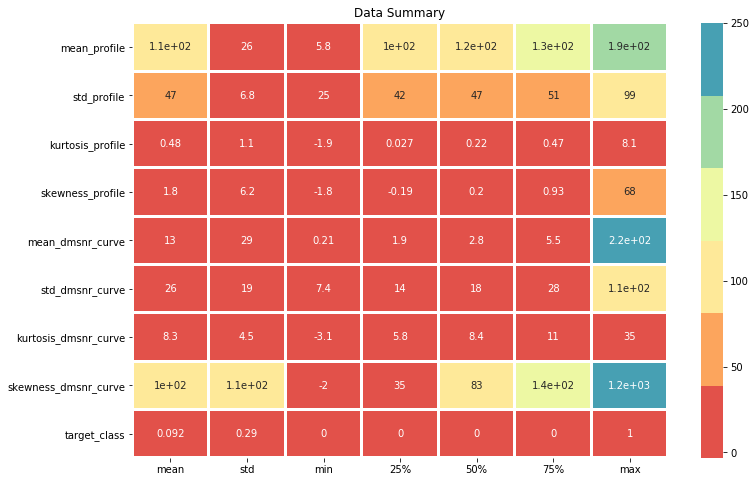

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.describe()[1:].transpose(), annot=True, linecolor='w',
            linewidth=2, vmax=2.5e2,
            cmap=sns.color_palette('Spectral'))
plt.title('Data Summary')
plt.show()

From the plot above:
* There is a `skewness_dmnsr_curve` that has a huge standard deviation, which can affect the precision of the model.
* There are huge outliers for `skewness_profile`, `mean_dmnsr_curve`, `std_dmsnr_curve` and `skewness_dmsnr_curve`.
* The range between features are significant, `mean_profile`, `std_profile`, and `skewness_dmsnr_curve` have greater values compared to the rest.

## Correlation between variables

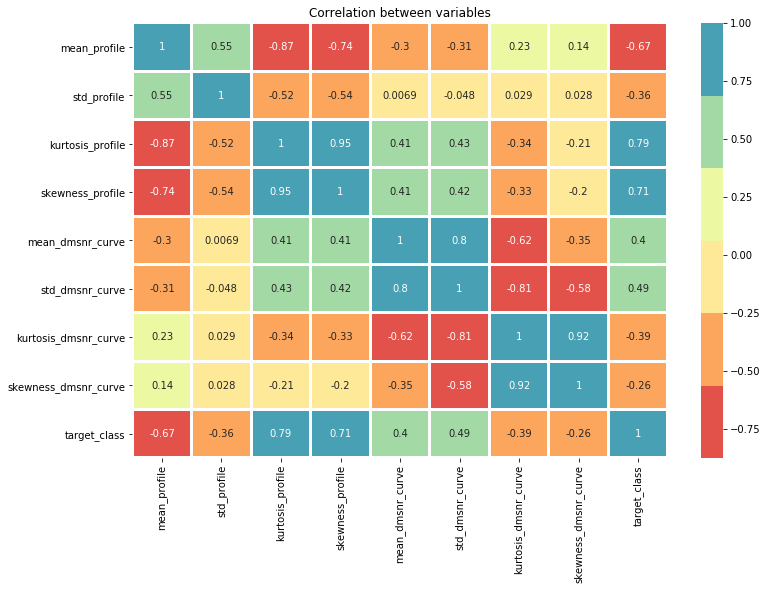

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette('Spectral'),
           linewidth=2, linecolor='w')
plt.title('Correlation between variables')
plt.show()

Based on the Pearson formula for correlation, the following features have strong correlation with target class.  Later, we will confirm if these features are the ones that contribute to higher accuracy:
* Mean of integrated profile
* Kurtosis of integrated profile
* Skewness of integrated profile


## Proportion of target variable in dataset

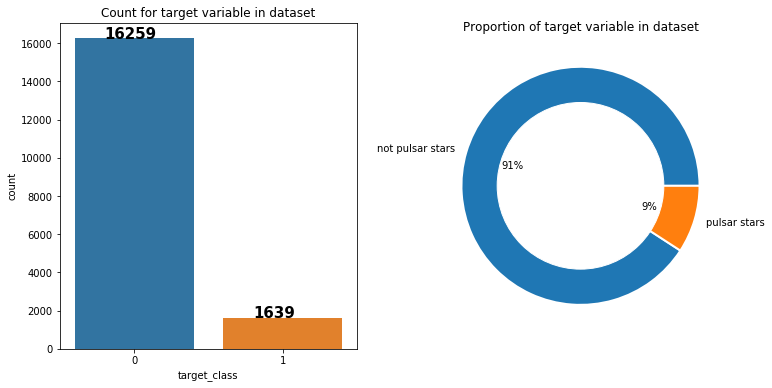

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
ax = sns.countplot(x=df["target_class"],
                   linewidth=1)
for i, j in enumerate(df["target_class"].value_counts().values):
    ax.text(-.2 + i, .7 + j, j, weight="bold", fontsize=15)
plt.title("Count for target variable in dataset")


plt.subplot(122)
plt.pie(df["target_class"].value_counts().values,
        labels=["not pulsar stars", "pulsar stars"],
        autopct="%1.0f%%", wedgeprops={"linewidth": 2, "edgecolor": "white"})
my_circ = plt.Circle((0, 0), .7, color="white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace=.25)
plt.title("Proportion of target variable in dataset")
plt.show()

The dataset is overly biased as non pulsar stars data greatly outnumbers pulsars stars by 10x.

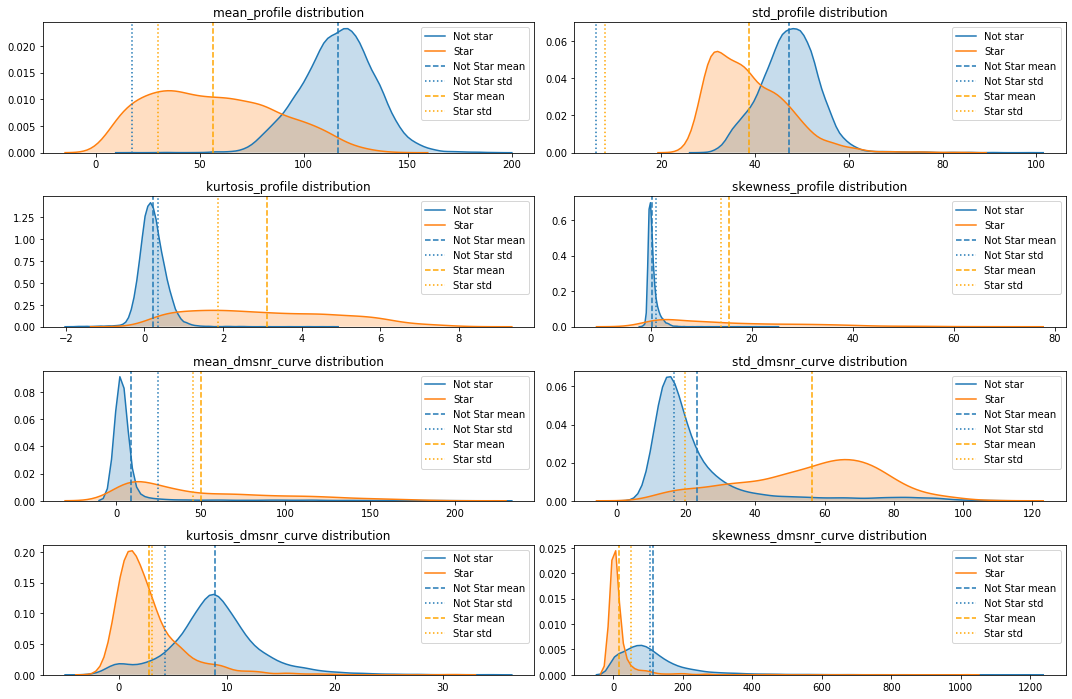

In [12]:
fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(nrows=5, ncols=2, figure=fig)

for i in range(len(df.columns[:-1])):
    col = df.columns[i]
    ss = gs[i]
    i += 1
    ax = fig.add_subplot(ss)
    not_star = df.loc[df.target_class == 0]
    sns.kdeplot(data=df.loc[df.target_class == 0][col], shade=True,
                label='Not star', ax=ax)
    sns.kdeplot(data=df.loc[df.target_class == 1][col], shade=True,
                label='Star', ax=ax)
    
    ax.axvline(df.loc[df.target_class == 0][col].mean(),color = 'tab:blue',
               linestyle='dashed', label='Not Star mean')
    ax.axvline(df.loc[df.target_class == 0][col].std(),color = 'tab:blue',
               linestyle='dotted', label='Not Star std')
    
    ax.axvline(df.loc[df.target_class == 1][col].mean(),color = 'orange',
               linestyle='dashed', label='Star mean')
    ax.axvline(df.loc[df.target_class == 1][col].std(),color = 'orange',
               linestyle='dotted', label='Star std')
    ax.legend(loc='upper right')
    ax.set_title(col + ' distribution')
gs.tight_layout(fig, rect=[0, 0, 1, 1])
plt.show()

* There is a clear overlap for the features `skewness_dmsnr_curve`, `std_profile` where we can misclassify pulsar from not pulsar start.
* Excess `std_dmsnr_curve` has a huge standard deviation for samples that are classified stars.
* From the data summary heatmap, we have confirmed outliers for `skewness_profile`, `mean_dmnsr_curve` and `skewness_dmsnr_curve`.

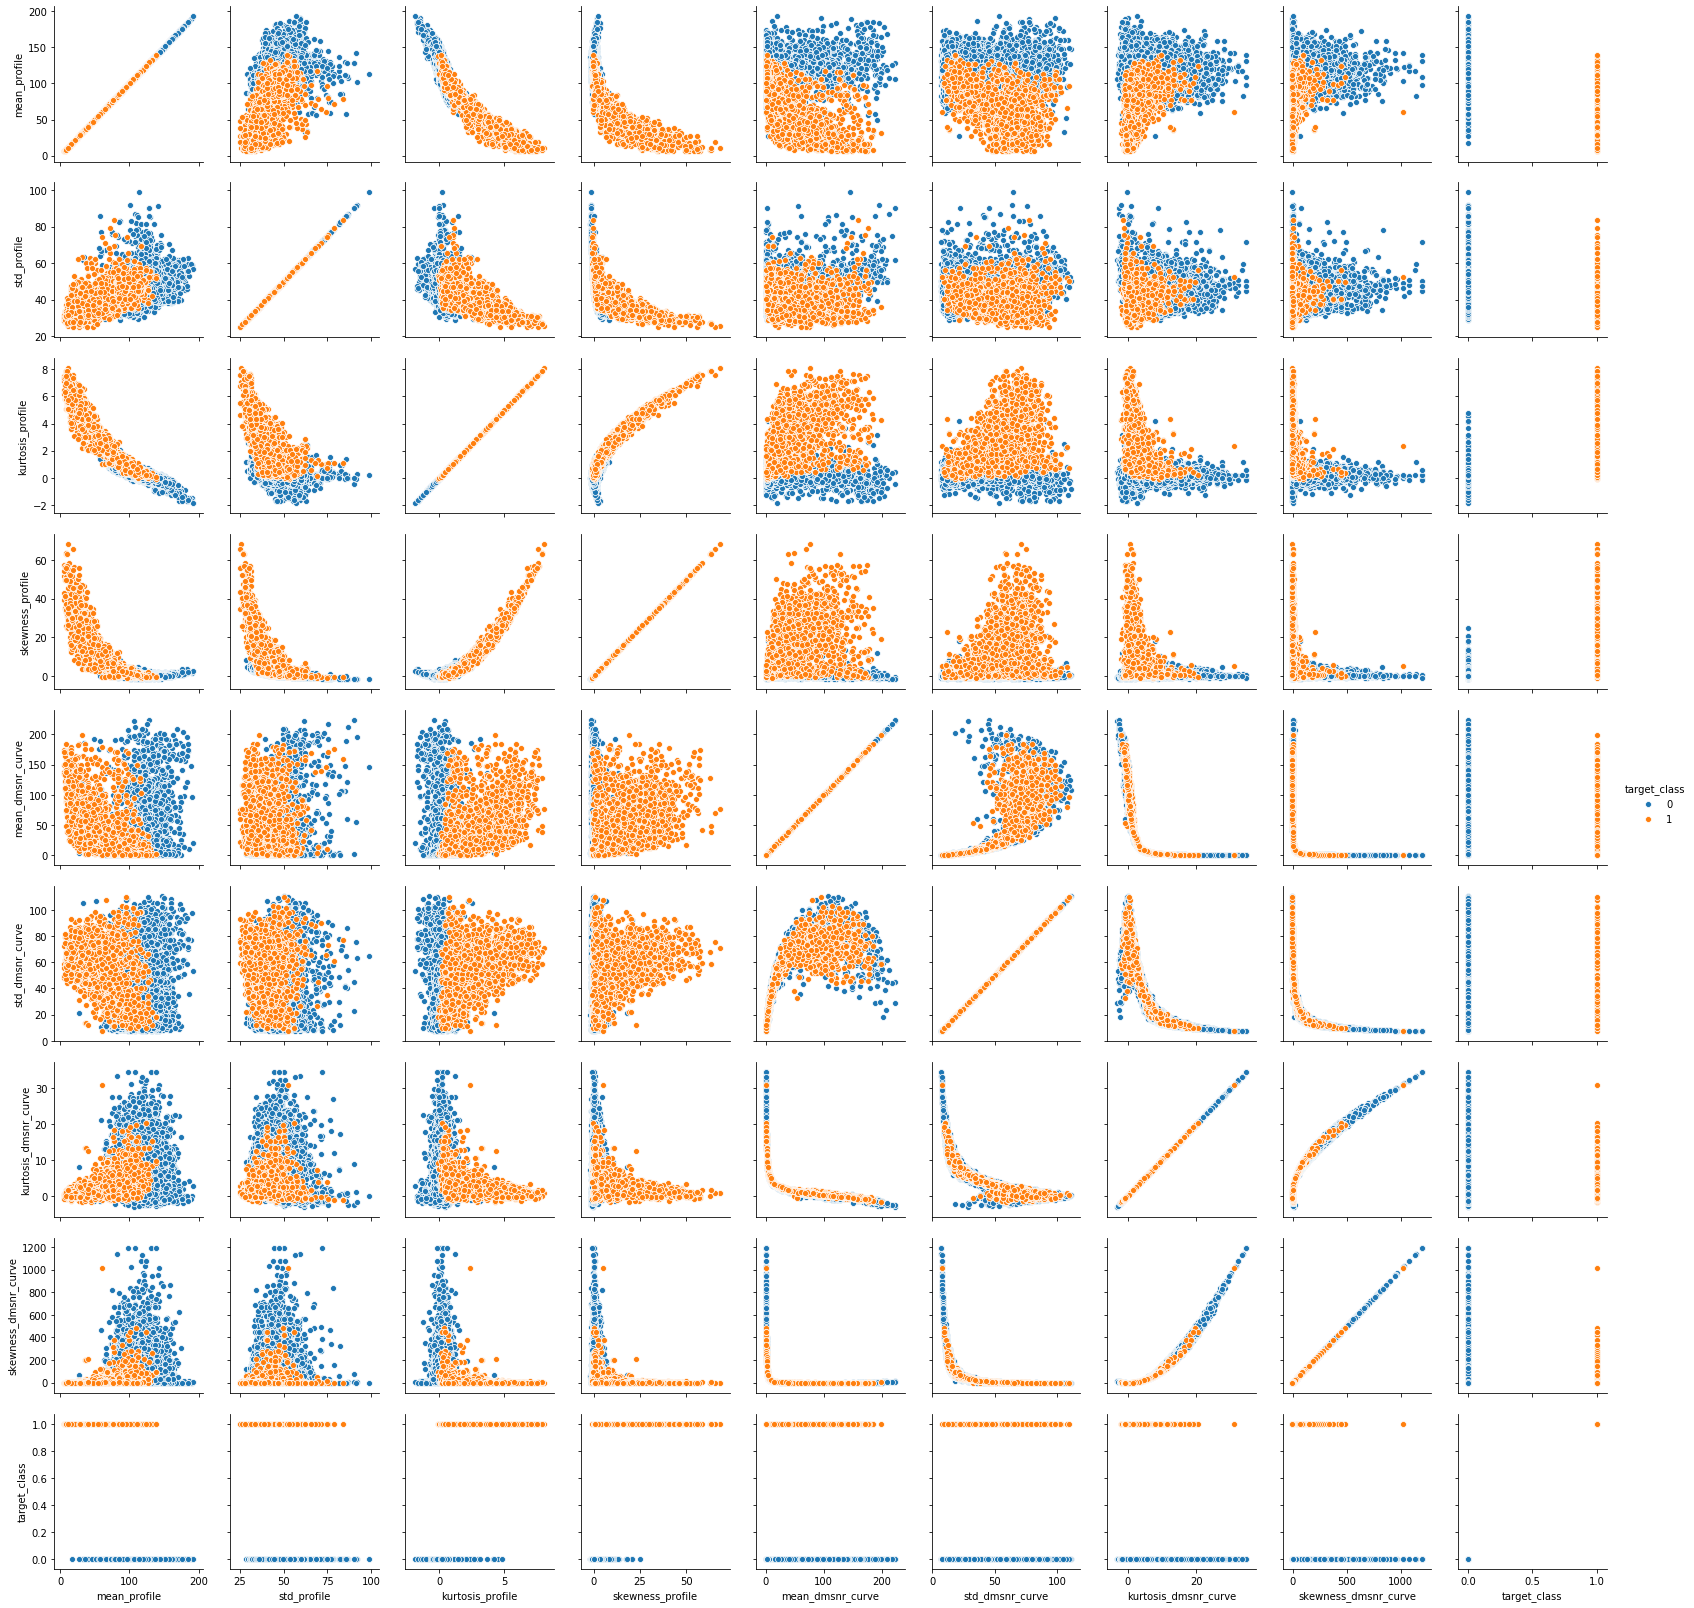

In [14]:
sns.pairplot(df, hue='target_class', diag_kind=None)
plt.show()

Inferences:

We can easily separate pulsar stars from non pulsar stars based on:
* mean_profile vs mean_dmsnr_curve
* kurtosis profile vs std_dmsnr_curve
* kurtosis profile vs mean_dmsnr_curve

## Feature Accuracy

By using the cross_val_score from the sklearn library, the group was able to determine specific features that the model can use to be able to classify data with a high accuracy. 

In [17]:
print(df.columns.values)

['mean_profile' 'std_profile' 'kurtosis_profile' 'skewness_profile'
 'mean_dmsnr_curve' 'std_dmsnr_curve' 'kurtosis_dmsnr_curve'
 'skewness_dmsnr_curve' 'target_class']


In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
clf = KNeighborsClassifier()
feature_acc = pd.DataFrame(columns=['Feature', 'Accuracy'])

for i in range(X.shape[1]):
    col = df.columns[i]
    x = X.iloc[:, i].values.reshape(-1, 1)
    scores = cross_val_score(clf, x, y)
    feature_acc = feature_acc.append({'Feature': col,
                        'Accuracy': scores.mean()},
                       ignore_index=True)

feature_acc_rev = pd.DataFrame(columns=['Feature_Removed', 'Accuracy'])

for i in range(X.shape[1]):
    col = df.columns[i]
    # Remove iterated feature
    x = X.drop(columns=[col], axis=1).values
    scores = cross_val_score(clf, x, y)
    feature_acc_rev = feature_acc_rev.append({'Feature_Removed': col,
                                              'Accuracy': scores.mean()},
                                             ignore_index=True)

print('Accuracy by Feature\n')
print(feature_acc.sort_values(by='Accuracy', ascending=False,
                              ignore_index=True))


Accuracy by Feature

                Feature  Accuracy
0      kurtosis_profile  0.976366
1      skewness_profile  0.967259
2          mean_profile  0.961616
3           std_profile  0.923790
4  skewness_dmsnr_curve  0.908258
5  kurtosis_dmsnr_curve  0.908035
6       std_dmsnr_curve  0.906917
7      mean_dmsnr_curve  0.903789


From the results on the image above, the top 3 features `kurtosis_profile`, `skewness_profile`, and `mean_profile` are the best features to choose when classifying pulsar stars. 

The lowest 3, on the other hand, are `kurtosis_dmsnr_curve`, `std_dmsnr_curve`, and `mean_dmsnr_curve`. With accuracies below 92%, these features are the poorest features that one can choose when classifying pulsar stars.

In order to determine if the findings is indeed true, an alternative approach was also taken into account wherein removing one feature at a time was also done and looking for the accuracy of the overall classification model. 


In [19]:
print('Accuracy by Feature Removed\n')
print(feature_acc_rev.sort_values(by='Accuracy', ascending=False,
                              ignore_index=True))

Accuracy by Feature Removed

        Feature_Removed  Accuracy
0  skewness_dmsnr_curve  0.972232
1           std_profile  0.971617
2      mean_dmsnr_curve  0.971393
3       std_dmsnr_curve  0.971338
4  kurtosis_dmsnr_curve  0.971114
5      kurtosis_profile  0.971058
6          mean_profile  0.971002
7      skewness_profile  0.970053


Based from the figure above, removing the same best features (`kurtosis_profile`, `mean_profile`, `skewness_profile`) has the biggest impact on the classification accuracy when removed. The skewness_dmsnr_curve remained to be one of the poorest features, as the result retains 97.22% accuracy. Meanwhile, `std_profile` and `mean_dmsnr_curv`e become the succeeding poor features identified since removing them enables the result to maintain at least 97.13% accuracy.

To generate a proper feature set, the group has done oversampling with the data wherein the oversampling will be discussed later in the paper. The same method was done with the new dataset with oversampling.


# <font color = "navy">D) KNN Implementation

## Original Sample 

In [18]:
n = 100  # Number of simulations
k = 30
neighbor_settings = np.arange(1, k + 1)  # n neighbors to test
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for seed in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                        random_state=seed)
    train_accuracy = []
    test_accuracy = []
    for i in neighbor_settings:
        print('Progress:...k={}...trial={}'.format(str(i).zfill(2),seed))
        clear_output(wait=True)
        knn = KNeighborsClassifier(i, n_jobs=-1).fit(X_train, y_train)
        train_accuracy.append(knn.score(X_train, y_train))
        test_accuracy.append(knn.score(X_test, y_test))
    df_train[seed] = train_accuracy
    df_test[seed] = test_accuracy
# Adjust index to represent number of neighbors
df_train.index += 1
df_test.index += 1

Progress:...k=30...trial=99


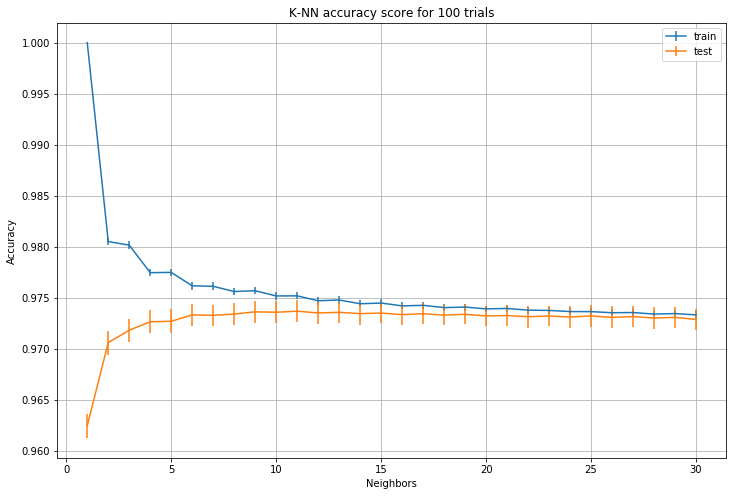

In [19]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(x=neighbor_settings, y=df_train.mean(axis=1),
             yerr=df_train.std(axis=1)/2, label='train')
plt.errorbar(x=neighbor_settings, y=df_test.mean(axis=1),
             yerr=df_test.std(axis=1)/2, label='test')
plt.legend()
plt.title('K-NN accuracy score for 100 trials')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [20]:
df_test.mean(axis=1).sort_values(ascending=False).head(10)

11    0.973687
9     0.973625
10    0.973584
13    0.973578
12    0.973515
15    0.973506
14    0.973448
17    0.973444
8     0.973406
19    0.973383
dtype: float64

In [21]:
df_test.std(axis=1).sort_values(ascending=True).head(10)

19    0.001984
18    0.002000
7     0.002004
20    0.002017
15    0.002024
13    0.002032
23    0.002036
17    0.002044
16    0.002058
29    0.002096
dtype: float64

In [22]:
print('13 n neighbor score')
print('score =', df_test.mean(axis=1).loc[13])
print('std =', df_test.std(axis=1).loc[13])

13 n neighbor score
score = 0.9735776536312848
std = 0.0020320369440773164


Based on the data, 13 n neighbors yields the highest accuracy score with the lowest standard deviation.

### PCC

In [23]:
pcc = 0
target_count = Counter(y)
print('Target Count:')
for k, v in target_count.items():
    print('{} = {}'.format(['Not Star', 'Star'][k], v))
N = X.shape[0]
for k, v in target_count.items():
    pcc += np.power(v/N, 2)
print()
print('Calculated Pcc = ', pcc)
print('1.25Pcc < accuracy')
print('{} < {} is {}'.format(1.25 * pcc, df_test.mean(axis=1).loc[13],
                             (1.25 * pcc) < df_test.mean(axis=1).loc[13]))

Target Count:
Not Star = 16259
Star = 1639

Calculated Pcc =  0.8336228147031661
1.25Pcc < accuracy
1.0420285183789577 < 0.9735776536312848 is False


Accuracy does not exceed the `1.25Pcc` Proportional by chance accuracy rate.

## Oversampling Pulsar Star

In [13]:
count_class0, count_class1 = df.target_class.value_counts()
df_class0 = df.loc[df['target_class'] == 0]
df_class1 = df.loc[df['target_class'] == 1]
df_class1_over = df_class1.sample(count_class0, random_state=1, replace=True)
df_over = pd.concat([df_class0, df_class1_over], axis=0)

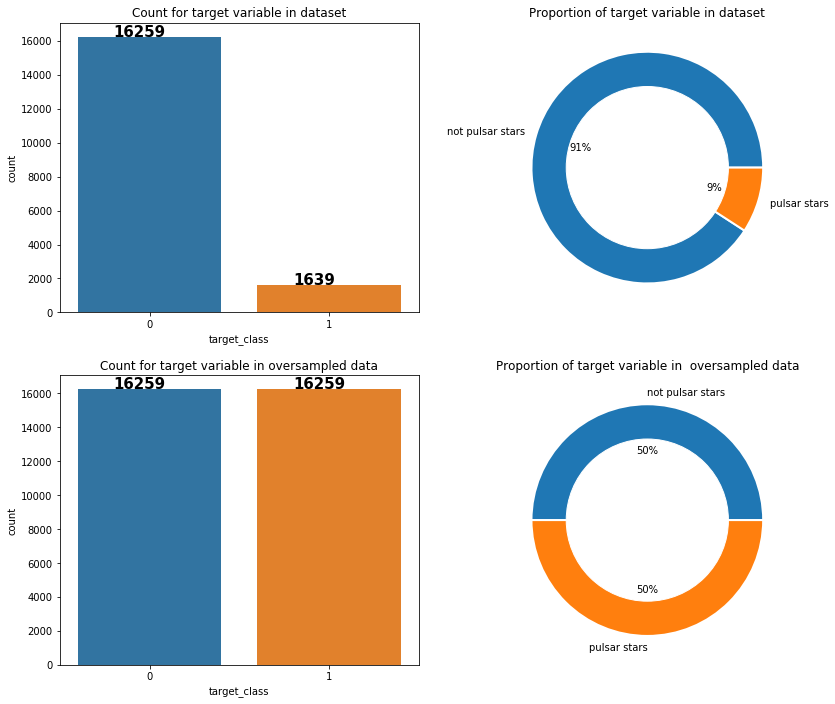

In [14]:
plt.figure(figsize=(12, 10))
# Original Data
plt.subplot(221)
ax = sns.countplot(x=df["target_class"],
                   linewidth=1)
for i, j in enumerate(df["target_class"].value_counts().values):
    ax.text(-.2 + i, .7 + j, j, weight="bold", fontsize=15)
plt.title("Count for target variable in dataset")


plt.subplot(222)
plt.pie(df["target_class"].value_counts().values,
        labels=["not pulsar stars", "pulsar stars"],
        autopct="%1.0f%%", wedgeprops={"linewidth": 2, "edgecolor": "white"})
my_circ = plt.Circle((0, 0), .7, color="white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace=.25)
plt.title("Proportion of target variable in dataset")

# Oversample data
plt.subplot(223)
ax = sns.countplot(x=df_over["target_class"],
                   linewidth=1)
for i, j in enumerate(df_over["target_class"].value_counts().values):
    ax.text(-.2 + i, .7 + j, j, weight="bold", fontsize=15)
plt.title("Count for target variable in oversampled data")


plt.subplot(224)
plt.pie(df_over["target_class"].value_counts().values,
        labels=["not pulsar stars", "pulsar stars"],
        autopct="%1.0f%%", wedgeprops={"linewidth": 2, "edgecolor": "white"})
my_circ = plt.Circle((0, 0), .7, color="white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace=.25)
plt.title("Proportion of target variable in  oversampled data")

plt.tight_layout(pad=1.5)
plt.show()

To improve the result of Pcc, we have oversampled the data

### New Feature Accuracy for Oversampled data

In [15]:
X_over = df_over.iloc[:, :-1]
y_over = df_over.iloc[:, -1]
clf = KNeighborsClassifier()
feature_acc = pd.DataFrame(columns=['Feature', 'Accuracy'])

for i in range(X_over.shape[1]):
    col = df_over.columns[i]
    x = X_over.iloc[:, i].values.reshape(-1, 1)
    scores = cross_val_score(clf, x, y_over)
    feature_acc = feature_acc.append({'Feature': col,
                        'Accuracy': scores.mean()},
                       ignore_index=True)

feature_acc_rev = pd.DataFrame(columns=['Feature_Removed', 'Accuracy'])

for i in range(X_over.shape[1]):
    col = df_over.columns[i]
    # Remove iterated feature
    x = X_over.drop(columns=[col], axis=1).values
    scores = cross_val_score(clf, x, y_over)
    feature_acc_rev = feature_acc_rev.append({'Feature_Removed': col,
                                              'Accuracy': scores.mean()},
                                             ignore_index=True)

print('Accuracy by Feature\n')
print(feature_acc.sort_values(by='Accuracy', ascending=False,
                              ignore_index=True))


Accuracy by Feature

                Feature  Accuracy
0      kurtosis_profile  0.969094
1      skewness_profile  0.953718
2          mean_profile  0.948275
3       std_dmsnr_curve  0.923397
4  kurtosis_dmsnr_curve  0.920783
5  skewness_dmsnr_curve  0.918999
6      mean_dmsnr_curve  0.913587
7           std_profile  0.900547


From the dataframe above, the best 3 features remain the same, even with over sampling (kurtosis_profile, skewness_profile, mean_profile). The poor features, on the other hand, are all nearing the 90% accuracy rate (skewness_dmsnr_curve, mean_dmsnr_curve, std_profile).


In [16]:
print('Accuracy by Feature Removed\n')
print(feature_acc_rev.sort_values(by='Accuracy', ascending=False,
                              ignore_index=True))

Accuracy by Feature Removed

        Feature_Removed  Accuracy
0  skewness_dmsnr_curve  0.970509
1      mean_dmsnr_curve  0.970324
2  kurtosis_dmsnr_curve  0.969678
3      kurtosis_profile  0.969525
4       std_dmsnr_curve  0.969248
5           std_profile  0.968879
6      skewness_profile  0.968448
7          mean_profile  0.967833


Based on the image above, oversampling while removing 1 feature at a time indicates that std_profile, skewness_profile, and mean_profile as the best features for classification accuracy, while skewness_dmsnr_curve, mean_dmsnr_curve, and kurtosis_dmsnr_curve are the 3 poorest features for classification accuracy.

### New PCC for Oversampled data

In [27]:
pcc = 0
target_count = Counter(y_over)
print('Target Count:')
for k, v in target_count.items():
    print('{} = {}'.format(['Not Star', 'Star'][k], v))
N = sum(target_count.values())
for k, v in target_count.items():
    pcc += np.power(v/N, 2)
print()
print('Calculated Pcc = ', pcc)

Target Count:
Not Star = 16259
Star = 16259

Calculated Pcc =  0.5


The distribution of the dataset is biased towards targets that are non-pulsar stars, with 9% of the samples classified as pulsar stars. The proportional by chance accuracy criteria (Pcc) of the dataset is 0.8336 or 83.36% based accuracy on the highest possible random chance. As a rule of thumb, a classifier model is highly successful if its accuracy exceeds 1.25 Pcc.  Oversampling reduces the bias of the dataset and lowers the Pcc.  By duplicating the number of pulsar star data to match the number of non-pulsar star data, the new calculated Pcc yields 0.5 or 50% base accuracy.


### KNN results for Oversampled data

In [29]:
n = 40  # Number of simulations
k = 30
neighbor_settings = np.arange(1, k + 1)  # n neighbors to test
df_train_over = pd.DataFrame()
df_test_over = pd.DataFrame()
for seed in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,
                                                        test_size=0.25,
                                                        random_state=seed)
    train_accuracy = []
    test_accuracy = []
    for i in neighbor_settings:
        knn = KNeighborsClassifier(i, n_jobs=-1).fit(X_train, y_train)
        train_accuracy.append(knn.score(X_train, y_train))
        test_accuracy.append(knn.score(X_test, y_test))
    df_train_over[seed] = train_accuracy
    df_test_over[seed] = test_accuracy
# Adjust index to represent number of neighbors
df_train_over.index += 1
df_test_over.index += 1

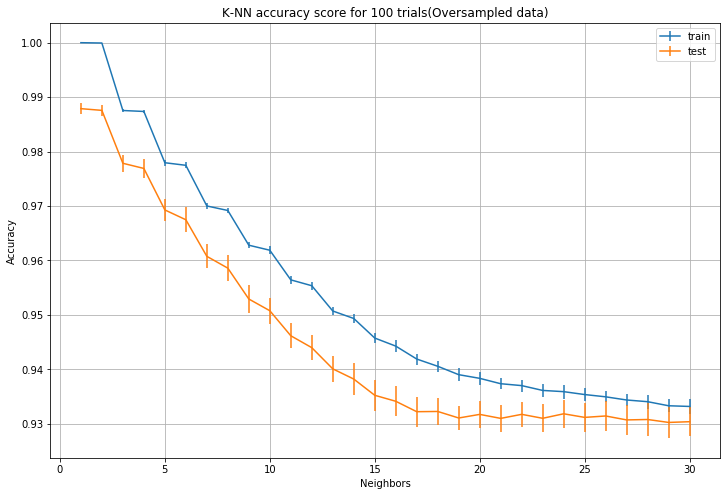

In [30]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(x=neighbor_settings, y=df_train_over.mean(axis=1),
             yerr=df_train_over.std(axis=1), label='train')
plt.errorbar(x=neighbor_settings, y=df_test_over.mean(axis=1),
             yerr=df_test_over.std(axis=1), label='test')
plt.legend()
plt.title('K-NN accuracy score for 100 trials(Oversampled data)')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

The lower the number of neighbors, the higher the accuracy score for the test dataset.

In [31]:
df_test_over.mean(axis=1).sort_values(ascending=False).head(10)

1     0.987884
2     0.987571
3     0.977854
4     0.976907
5     0.969287
6     0.967485
7     0.960766
8     0.958595
9     0.952927
10    0.950778
dtype: float64

In [32]:
df_test_over.std(axis=1).sort_values(ascending=True).head(10)

2     0.001051
1     0.001052
3     0.001606
4     0.001725
5     0.002008
7     0.002197
19    0.002269
6     0.002281
12    0.002315
11    0.002319
dtype: float64

In [33]:
print('1.25Pcc < accuracy')
print('{} < {} is {}'.format(1.25 * pcc, df_test_over.mean(axis=1).loc[4],
                             (1.25 * pcc) < df_test_over.mean(axis=1).loc[4]))

1.25Pcc < accuracy
0.625 < 0.9769065190651907 is True


## Removing Poor Features

In [36]:
n = 40  # Number of simulations
k = 30
neighbor_settings = np.arange(1, k + 1)  # n neighbors to test
df_train_over_new = pd.DataFrame()
df_test_over_new = pd.DataFrame()
X_over_new = X_over.drop('skewness_dmsnr_curve', axis=1)
for seed in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X_over_new, y_over,
                                                        test_size=0.25,
                                                        random_state=seed)
    train_accuracy = []
    test_accuracy = []
    for i in neighbor_settings:
        knn = KNeighborsClassifier(i, n_jobs=-1).fit(X_train, y_train)
        train_accuracy.append(knn.score(X_train, y_train))
        test_accuracy.append(knn.score(X_test, y_test))
    df_train_over_new[seed] = train_accuracy
    df_test_over_new[seed] = test_accuracy
# Adjust index to represent number of neighbors
df_train_over_new.index += 1
df_test_over_new.index += 1

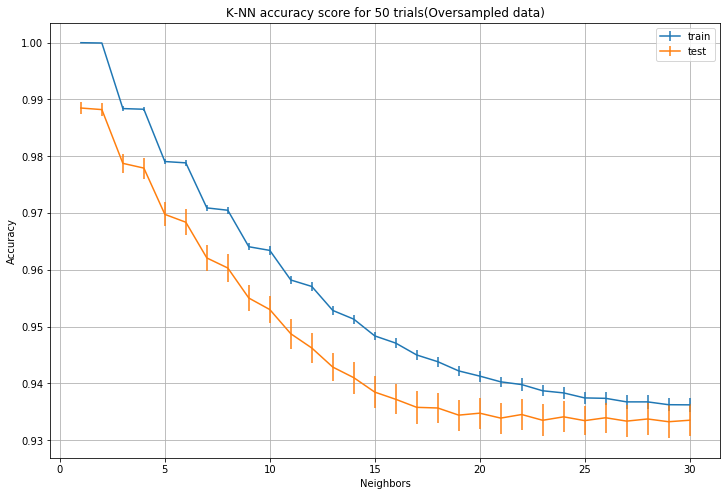

In [37]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(x=neighbor_settings, y=df_train_over_new.mean(axis=1),
             yerr=df_train_over_new.std(axis=1), label='train')
plt.errorbar(x=neighbor_settings, y=df_test_over_new.mean(axis=1),
             yerr=df_test_over_new.std(axis=1), label='test')
plt.legend()
plt.title('K-NN accuracy score for 50 trials(Oversampled data)')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [38]:
df_test_over_new.mean(axis=1).sort_values(ascending=False).head(10)

1     0.988496
2     0.988220
3     0.978755
4     0.977921
5     0.969772
6     0.968389
7     0.962100
8     0.960326
9     0.955040
10    0.953010
dtype: float64

In [39]:
df_test_over_new.std(axis=1).sort_values(ascending=True).head(10)

1     0.000980
2     0.001107
3     0.001633
4     0.001843
5     0.002095
6     0.002254
7     0.002306
9     0.002361
10    0.002397
13    0.002409
dtype: float64

### KNN Model per amount of features

In [40]:
X_over_1 = X_over.drop('skewness_dmsnr_curve', axis=1)
X_over_2 = X_over.drop('mean_dmsnr_curve', axis=1)
X_over_3 = X_over.drop('kurtosis_dmsnr_curve', axis=1)
X_over_4 = X_over.drop('kurtosis_profile', axis=1)
X_over_5 = X_over.drop('std_dmsnr_curve', axis=1)
X_over_6 = X_over.drop('std_profile', axis=1)

In [41]:
X_over_1 = X_over[['kurtosis_profile', 'skewness_profile', 'mean_profile', 
                  'std_dmsnr_curve', 'kurtosis_dmsnr_curve']]
X_over_2 = X_over[['kurtosis_profile', 'skewness_profile', 'mean_profile', 
                  'std_dmsnr_curve']]
X_over_3 = X_over[['kurtosis_profile', 'skewness_profile', 'mean_profile']]
X_over_4 = X_over[['kurtosis_profile', 'skewness_profile']]

#### 5 Features

In [42]:
n = 40  # Number of simulations
k = 30
neighbor_settings = np.arange(1, k + 1)  # n neighbors to test
df_train_over_f1 = pd.DataFrame()
df_test_over_f1 = pd.DataFrame()
for seed in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X_over_1, y_over,
                                                        test_size=0.25,
                                                        random_state=seed)
    train_accuracy = []
    test_accuracy = []
    for i in neighbor_settings:
        print('Progress:...k={}...trial={}'.format(str(i).zfill(2),seed))
        clear_output(wait=True)
        knn = KNeighborsClassifier(i, n_jobs=-1).fit(X_train, y_train)
        train_accuracy.append(knn.score(X_train, y_train))
        test_accuracy.append(knn.score(X_test, y_test))
    df_train_over_f1[seed] = train_accuracy
    df_test_over_f1[seed] = test_accuracy
# Adjust index to represent number of neighbors
df_train_over_f1.index += 1
df_test_over_f1.index += 1

Progress:...k=30...trial=39


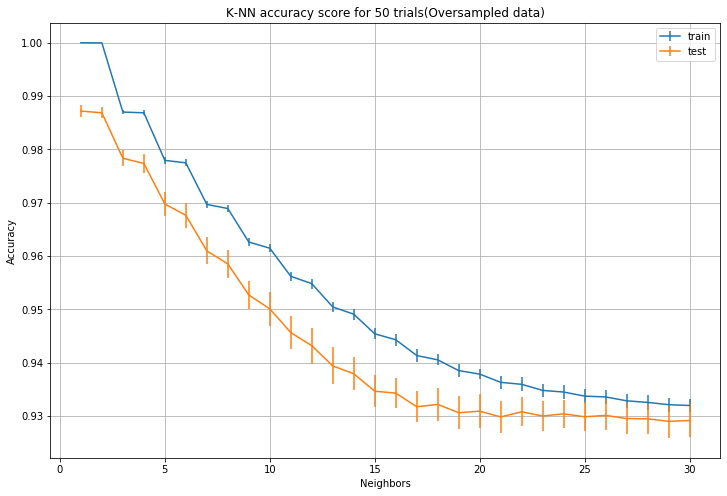

In [43]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(x=neighbor_settings, y=df_train_over_f1.mean(axis=1),
             yerr=df_train_over_f1.std(axis=1), label='train')
plt.errorbar(x=neighbor_settings, y=df_test_over_f1.mean(axis=1),
             yerr=df_test_over_f1.std(axis=1), label='test')
plt.legend()
plt.title('K-NN accuracy score for 50 trials(Oversampled data)')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

#### 4 Features

In [44]:
n = 40  # Number of simulations
k = 30
neighbor_settings = np.arange(1, k + 1)  # n neighbors to test
df_train_over_f2 = pd.DataFrame()
df_test_over_f2 = pd.DataFrame()
for seed in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X_over_2, y_over,
                                                        test_size=0.25,
                                                        random_state=seed)
    train_accuracy = []
    test_accuracy = []
    for i in neighbor_settings:
        print('Progress:...k={}...trial={}'.format(str(i).zfill(2),seed))
        clear_output(wait=True)
        knn = KNeighborsClassifier(i, n_jobs=-1).fit(X_train, y_train)
        train_accuracy.append(knn.score(X_train, y_train))
        test_accuracy.append(knn.score(X_test, y_test))
    df_train_over_f2[seed] = train_accuracy
    df_test_over_f2[seed] = test_accuracy
# Adjust index to represent number of neighbors
df_train_over_f2.index += 1
df_test_over_f2.index += 1

Progress:...k=30...trial=39


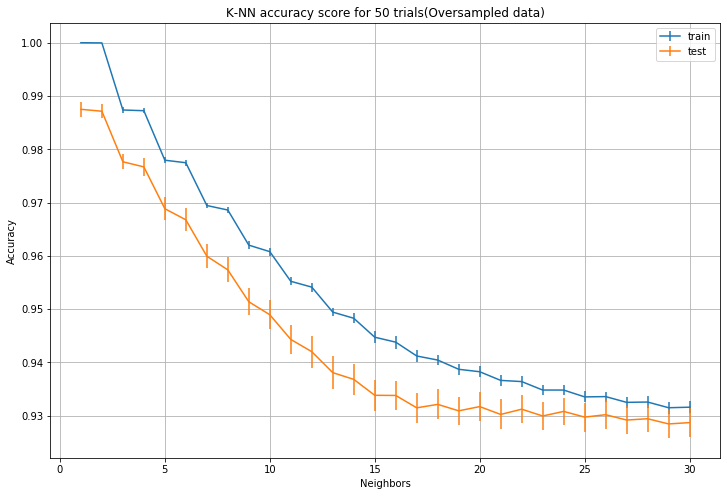

In [45]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(x=neighbor_settings, y=df_train_over_f2.mean(axis=1),
             yerr=df_train_over_f2.std(axis=1), label='train')
plt.errorbar(x=neighbor_settings, y=df_test_over_f2.mean(axis=1),
             yerr=df_test_over_f2.std(axis=1), label='test')
plt.legend()
plt.title('K-NN accuracy score for 50 trials(Oversampled data)')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

#### 3 Features

In [46]:
n = 40  # Number of simulations
k = 30
neighbor_settings = np.arange(1, k + 1)  # n neighbors to test
df_train_over_f3 = pd.DataFrame()
df_test_over_f3 = pd.DataFrame()
for seed in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X_over_3, y_over,
                                                        test_size=0.25,
                                                        random_state=seed)
    train_accuracy = []
    test_accuracy = []
    for i in neighbor_settings:
        print('Progress:...k={}...trial={}'.format(str(i).zfill(2),seed))
        clear_output(wait=True)
        knn = KNeighborsClassifier(i, n_jobs=-1).fit(X_train, y_train)
        train_accuracy.append(knn.score(X_train, y_train))
        test_accuracy.append(knn.score(X_test, y_test))
    df_train_over_f3[seed] = train_accuracy
    df_test_over_f3[seed] = test_accuracy
# Adjust index to represent number of neighbors
df_train_over_f3.index += 1
df_test_over_f3.index += 1

Progress:...k=30...trial=39


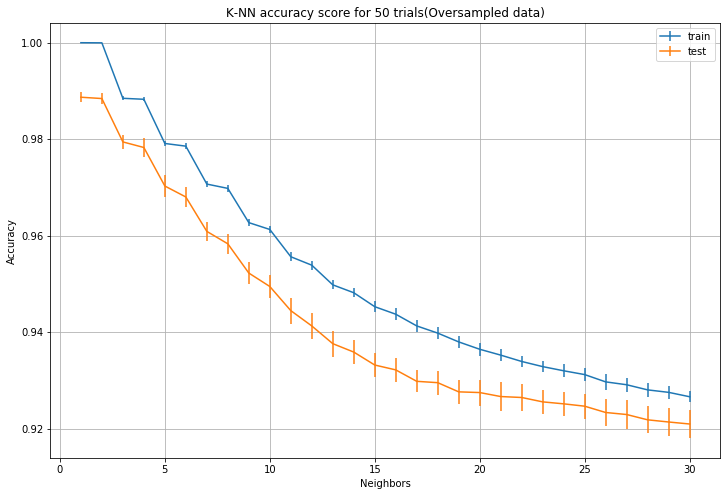

In [47]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(x=neighbor_settings, y=df_train_over_f3.mean(axis=1),
             yerr=df_train_over_f3.std(axis=1), label='train')
plt.errorbar(x=neighbor_settings, y=df_test_over_f3.mean(axis=1),
             yerr=df_test_over_f3.std(axis=1), label='test')
plt.legend()
plt.title('K-NN accuracy score for 50 trials(Oversampled data)')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

#### 2 Features

In [48]:
n = 40  # Number of simulations
k = 30
neighbor_settings = np.arange(1, k + 1)  # n neighbors to test
df_train_over_f4 = pd.DataFrame()
df_test_over_f4 = pd.DataFrame()
for seed in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X_over_4, y_over,
                                                        test_size=0.25,
                                                        random_state=seed)
    train_accuracy = []
    test_accuracy = []
    for i in neighbor_settings:
        print('Progress:...k={}...trial={}'.format(str(i).zfill(2),seed))
        clear_output(wait=True)
        knn = KNeighborsClassifier(i, n_jobs=-1).fit(X_train, y_train)
        train_accuracy.append(knn.score(X_train, y_train))
        test_accuracy.append(knn.score(X_test, y_test))
    df_train_over_f4[seed] = train_accuracy
    df_test_over_f4[seed] = test_accuracy
# Adjust index to represent number of neighbors
df_train_over_f4.index += 1
df_test_over_f4.index += 1

Progress:...k=30...trial=39


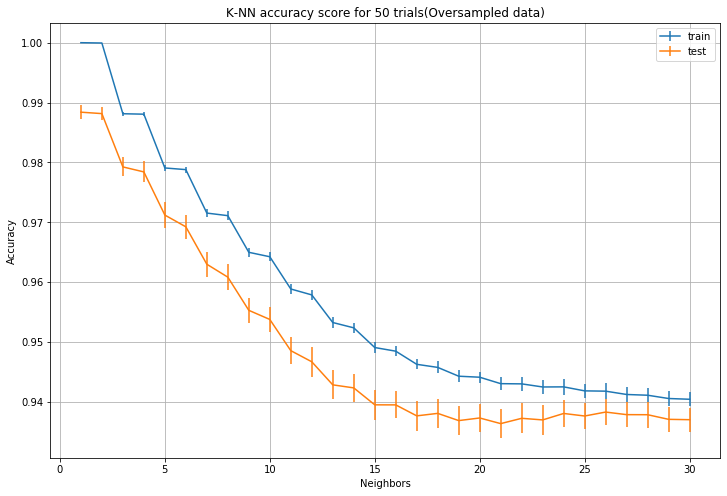

In [49]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(x=neighbor_settings, y=df_train_over_f4.mean(axis=1),
             yerr=df_train_over_f4.std(axis=1), label='train')
plt.errorbar(x=neighbor_settings, y=df_test_over_f4.mean(axis=1),
             yerr=df_test_over_f4.std(axis=1), label='test')
plt.legend()
plt.title('K-NN accuracy score for 50 trials(Oversampled data)')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

#### Graphical Summary 

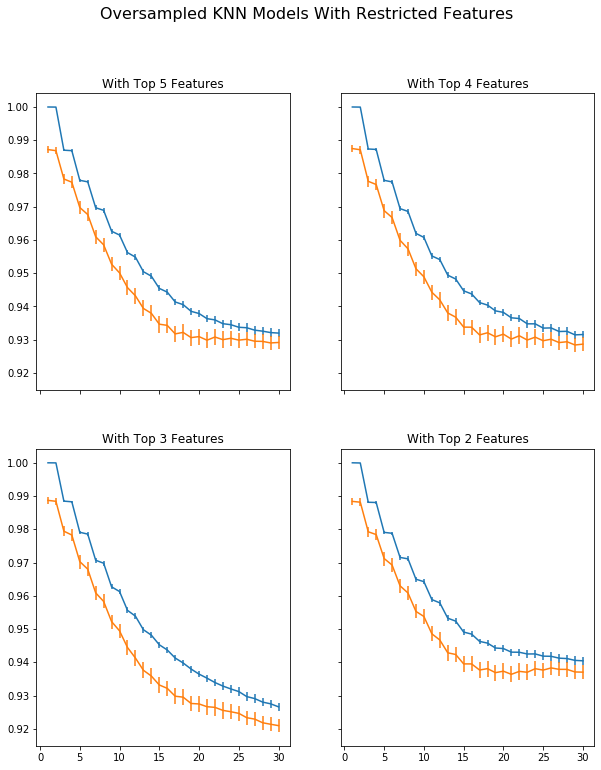

In [50]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey=True,
                       figsize=(10,12))

ax[0,0].errorbar(x=neighbor_settings, y=df_train_over_f1.mean(axis=1),
             yerr=df_train_over_f4.std(axis=1), label='train')
ax[0,0].errorbar(x=neighbor_settings, y=df_test_over_f1.mean(axis=1),
             yerr=df_test_over_f4.std(axis=1), label='test')
ax[0,0].set_title("With Top 5 Features")


ax[0,1].errorbar(x=neighbor_settings, y=df_train_over_f2.mean(axis=1),
             yerr=df_train_over_f4.std(axis=1), label='train')
ax[0,1].errorbar(x=neighbor_settings, y=df_test_over_f2.mean(axis=1),
             yerr=df_test_over_f4.std(axis=1), label='test')
ax[0,1].set_title("With Top 4 Features")

ax[1,0].errorbar(x=neighbor_settings, y=df_train_over_f3.mean(axis=1),
             yerr=df_train_over_f4.std(axis=1), label='train')
ax[1,0].errorbar(x=neighbor_settings, y=df_test_over_f3.mean(axis=1),
             yerr=df_test_over_f4.std(axis=1), label='test')
ax[1,0].set_title("With Top 3 Features")

ax[1,1].errorbar(x=neighbor_settings, y=df_train_over_f4.mean(axis=1),
             yerr=df_train_over_f4.std(axis=1), label='train')
ax[1,1].errorbar(x=neighbor_settings, y=df_test_over_f4.mean(axis=1),
             yerr=df_test_over_f4.std(axis=1), label='test')
ax[1,1].set_title("With Top 2 Features")

fig.suptitle('Oversampled KNN Models With Restricted Features', fontsize=16)
plt.show()

# <font color = "navy"> E) Discussion of results 

The HTRU2 dataset consists of 1,639 pulsars as well as 16,259 non-pulsar candidates, which is highly unbalanced with only 9 out of 100 observations as pulsars.  Machine learning (ML) models trained in an unbalanced dataset tends to tag observations as non-pulsar rather than pulsar.  Using the dataset as it is, accuracy does not exceed the 1.25 PCC (proportion chance criteria).  To improve the result of the PCC and alleviate this bias, we used over-sampling technique to balance the training data.  We then randomly divided the data into two subsets; a training set and a testing set at 75% to 25% ratio.

The features were then analyzed individually for their accuracy since not all features are necessary for an ML model as some of them may be redundant or ineffective.  For an ML model, the design of its inputs is essential.  There are many approaches to extract and construct pulsar features from surveys.  Generally, there are two kinds of features of pulsar candidates.  One is called empirical features such as the dispersion measure (DM), the period and the signal to noise ratio (SNR).  The other one is called statistical features such as the mean or the standard deviation of the folded profile<sup>5</sup>.   From our analysis of feature accuracy, it seems that statistical features give better accuracy compared to metrics derived from the DM-SNR curve.  Converting integrated profile to DM-SNR curve hardly improves the accuracy.

Another motivation of feature selection comes from its potential benefits: making data visualized and understandable, reducing the measurement and storage requirements, reducing training and prediction time, defying the curse of dimensionality to improve prediction performance (Guyon and Elisseeff, 2003). In existing literatures of ML-based pulsar detection scheme, the number of the features for models is more than six, and some even up to twenty-two, which means one should collect enough information and extract a lot of features before training a model.  Being able to predict a candidate correctly using a small number of features makes candidate selection less complex since we just need to focus on these very few but relevant features instead of all the features.

From the initial run we were able to determine that **13 n neighbors** yield the highest accuracy score with the lowest standard deviation.  Additional KNN trials were then conducted with successively fewer features to compare their accuracy scores and show that it is possible to create a simpler model using only the best features that contribute to the accuracy score.  


**References:**

---
1. Arzoumanian, Z., Baker, P. T., Brazier, A., Burke-Spolaor, S., Chamberlin, S. J., Chatterjee, S., et al., The NANOGrav Collaboration. 2018. The NANOGrav 11 year data set: pulsar-timing constraints on the stochastic gravitational-wave background. Astrophys. J. 859:47. doi: 10.3847/1538-4357/aabd3b

2. Carvalho, N.R., 2019. Predicting a Pulsar Star Using Neural Networks. Medium. Retrieved from: https://medium.com/@nunorc/predicting-pulsar-stars-using-neural-networks-ecb3a527336b

3. Greicius, T., 2017., Listening for Gravitational Waves Using Pulsars. National Aeronautics and Space Administration. Retrieved from: https://www.nasa.gov/feature/jpl/listening-for-gravitational-waves-using-pulsars

4. Lin, H., Li, X. and Luo, Z., 2020. Pulsars detection by machine learning with very few features. Monthly Notices of the Royal Astronomical Society, 493(2), pp.1842-1854.

5. Lyon, R. J., Stappers, B. W., Cooper, S., Brooke, J. M., Knowles, J. D. , Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656 

6. Lyon, R. J., HTRU2, DOI: 10.6084/m9.figshare.3080389.v1. 

7. Scaife, A., 2019. Introduction to Machine Learning. Cern School of Computing. Retrieved from: https://as595.github.io/classification/

8. Taylor, S (2019) Catching Gravitational Waves With a Galaxy-Sized Net of Pulsars. Front. Young Minds. 7:80. doi: 10.3389/frym.2019.00080


